# **ML-Assignment-4-Classification Problem**

## The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

### Using the breast cancer dataset available in the sklearn library.

#### Loading and Preprocessing the breast cancer dataset from sklearn to handle any missing values and perform necessary feature scaling.

In [29]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# Loading the dataset
data = load_breast_cancer()
# Creating a DataFrame with the features
df = pd.DataFrame(data.data, columns=data.feature_names)
# Adding the target column
df['target'] = data.target
# Displaying the rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [30]:
# Checking the null values for each coloumn
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### **Correlation of each feature with the target**

In [31]:
# Calculate correlation of each feature with the target
CorrelationWithTarget = df.corr()['target'].abs().sort_values(ascending=False)
# Print the sorted correlations
print(CorrelationWithTarget)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [32]:
# Selecting the top 10 features most correlated with the target by excluding 'target' itself
TopFeatures = CorrelationWithTarget[1:11].index
# Printing the top features
print(TopFeatures)

Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')


In [33]:
# Defining feature matrix x using the top correlated features
x = df[TopFeatures]
# Defining target variable y
y = df['target']
# Printing the names of the target classes
print(data.target_names)

['malignant' 'benign']


In [34]:
import numpy as np
# Printing the unique values in the target variable
print(np.unique(y))

[0 1]


In [35]:
# Printing the number of occurrences of each class in the target column
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


#### The dataset is slightly imbalanced.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

### **Classification Algorithm Implementation**

#### **Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
# Initializing the logistic regression model
LogicModel = LogisticRegression()
# Training the model using the training data
LogicModel.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_predict_Logic = LogicModel.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_predict_Logic):.4f}")
print(f"Precision: {precision_score(y_test, y_predict_Logic):.4f}")
print(f"Recall:    {recall_score(y_test, y_predict_Logic):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_predict_Logic):.4f}")

Model Performance Metrics:
Accuracy:  0.9737
Precision: 0.9857
Recall:    0.9718
F1 Score:  0.9787


##### Because the dataset is imbalanced, it’s important to use weighted average and macro average metrics to accurately evaluate the overall model performance.

In [41]:
from sklearn.metrics import classification_report
# Generating and print a detailed classification report for each class
print(classification_report(y_test, y_predict_Logic, target_names=['Cancer', 'Non-Cancer']))

              precision    recall  f1-score   support

      Cancer       0.95      0.98      0.97        43
  Non-Cancer       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##### Since the dataset is imbalanced, using both weighted and macro averages provides a more accurate assessment of overall model performance.

In [52]:
print("Extended Metrics:")
print("Precision (Macro):    ", precision_score(y_test, y_predict_Logic, average='macro'))
print("Recall (Macro):       ", recall_score(y_test, y_predict_Logic, average='macro'))
print("F1 Score (Macro):     ", f1_score(y_test, y_predict_Logic, average='macro'))

print("Precision (Weighted): ", precision_score(y_test, y_predict_Logic, average='weighted'))
print("Recall (Weighted):    ", recall_score(y_test, y_predict_Logic, average='weighted'))
print("F1 Score (Weighted):  ", f1_score(y_test, y_predict_Logic, average='weighted'))

Extended Metrics:
Precision (Macro):     0.9701298701298702
Recall (Macro):        0.9742875859810023
F1 Score (Macro):      0.9721203228173148
Precision (Weighted):  0.9739576213260425
Recall (Weighted):     0.9736842105263158
F1 Score (Weighted):   0.9737421322933159


##### Confusion matrix to visualize True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for classes 0 and 1, the foundation for evaluating precision, recall, and F1 score.

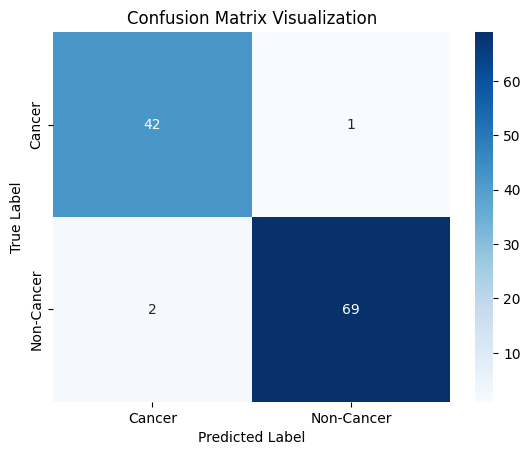

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_predict_Logic)

# Plotting the confusion matrix using a heatmap
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Cancer', 'Non-Cancer'], 
    yticklabels=['Cancer', 'Non-Cancer']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

##### On average, 97.42% of the positive predictions, across both the cancer and non-cancer classes—were accurate.
##### The macro average gives equal weight to each class, regardless of their sample sizes.
##### Interpretation: The model demonstrates balanced precision across both classes, indicating no class-specific bias.

#### **Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initializing the Decision Tree classifier with a fixed random seed
DecisionTree_classifier = DecisionTreeClassifier(random_state=42)
# Training the model on the training data
DecisionTree_classifier.fit(x_train, y_train)
# Predicting the target values for the test set
y_predict_Decision = DecisionTree_classifier.predict(x_test)
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_predict_Decision)
precision = precision_score(y_test, y_predict_Decision)
recall = recall_score(y_test, y_predict_Decision)
f1 = f1_score(y_test, y_predict_Decision)
# Displaying the results
print("Decision Tree - Performance Metrics:")
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Decision Tree - Performance Metrics:
Accuracy:0.9298
Precision:0.9315
Recall:0.9577
F1 Score:0.9444


In [48]:
# Display the detailed classification report with class labels
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_predict_Decision, target_names=data.target_names))


Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        43
      benign       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [50]:
# Calculating the macro averaged metrics (treats all classes equally)
precision_macro = precision_score(y_test, y_predict_Decision, average='macro')
recall_macro = recall_score(y_test, y_predict_Decision, average='macro')
f1_macro = f1_score(y_test, y_predict_Decision, average='macro')
# Calculating the weighted-averaged metrics (accounts for class imbalance)
precision_weighted = precision_score(y_test, y_predict_Decision, average='weighted')
recall_weighted = recall_score(y_test, y_predict_Decision, average='weighted')
f1_weighted = f1_score(y_test, y_predict_Decision, average='weighted')
# Displaying the extended evaluation metrics
print("\nExtended Evaluation Metrics (Decision Tree):")
print(f"Macro Precision:{precision_macro:.4f}")
print(f"Macro Recall:{recall_macro:.4f}")
print(f"Macro F1 Score:{f1_macro:.4f}")
print(f"Weighted Precision:{precision_weighted:.4f}")
print(f"Weighted Recall:{recall_weighted:.4f}")
print(f"Weighted F1 Score:{f1_weighted:.4f}")


Extended Evaluation Metrics (Decision Tree):
Macro Precision:0.9292
Macro Recall:0.9207
Macro F1 Score:0.9246
Weighted Precision:0.9297
Weighted Recall:0.9298
Weighted F1 Score:0.9295


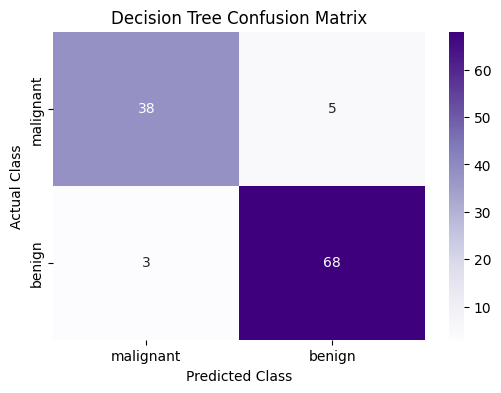

In [51]:
# Computing the confusion matrix for Decision Tree predictions
cm_dt = confusion_matrix(y_test, y_predict_Decision)
# Creating a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_dt, 
    annot=True, 
    fmt='d', 
    cmap='Purples', 
    xticklabels=data.target_names, 
    yticklabels=data.target_names
)
# Adding plot labels and title
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Decision Tree Confusion Matrix")
plt.show()

##### The model demonstrated strong and balanced performance, with an Macro F1 Score of 0.9246 and an Weighted F1 Score of 0.9295. This indicates effective classification across both cancerous and non-cancerous cases.
##### The minimal gap between the macro and weighted scores suggests that the model handles class imbalance well and maintains consistent accuracy across both classes.

##### Overall, the Decision Tree classifier shows reliability in minimizing both false positives and false negatives, making it a suitable choice for medical diagnosis applications.

### **Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier
# Initializing and train the Random Forest classifier
RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(x_train, y_train)
# Making the predictions on the test data
y_predict_Random = RandomForest.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluating the performance metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_predict_Random)
precision_rf = precision_score(y_test, y_predict_Random)
recall_rf = recall_score(y_test, y_predict_Random)
f1_rf = f1_score(y_test, y_predict_Random)
# Displaying the results
print("Random Forest - Evaluation Metrics:")
print(f"Accuracy:{accuracy_rf:.4f}")
print(f"Precision:{precision_rf:.4f}")
print(f"Recall:{recall_rf:.4f}")
print(f"F1 Score:{f1_rf:.4f}")

Random Forest - Evaluation Metrics:
Accuracy:0.9561
Precision:0.9583
Recall:0.9718
F1 Score:0.9650


In [60]:
from sklearn.metrics import classification_report
# Printing the detailed classification report for the Random Forest model
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_predict_Random, target_names=data.target_names))


Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [68]:
# Calculating the macro-averaged metrics (treats all classes equally)
precision_macro_rf = precision_score(y_test, y_predict_Random, average='macro')
recall_macro_rf = recall_score(y_test, y_predict_Random, average='macro')
f1_macro_rf = f1_score(y_test, y_predict_Random, average='macro')
# Calculating the weighted-averaged metrics (accounts for class imbalance)
precision_weighted_rf = precision_score(y_test, y_predict_Random, average='weighted')
recall_weighted_rf = recall_score(y_test, y_predict_Random, average='weighted')
f1_weighted_rf = f1_score(y_test, y_predict_Random, average='weighted')
# Displaying the extended evaluation metrics
print("\nExtended Metrics (Random Forest):")
print(f"Macro Precision:{precision_macro_rf:.4f}")
print(f"Macro Recall:{recall_macro_rf:.4f}")
print(f"Macro F1 Score:{f1_macro_rf:.4f}")
print(f"Weighted Precision:{precision_weighted_rf:.4f}")
print(f"Weighted Recall:{recall_weighted_rf:.4f}")
print(f"Weighted F1 Score:{f1_weighted_rf:.4f}")


Extended Metrics (Random Forest):
Macro Precision:0.9554
Macro Recall:0.9510
Macro F1 Score:0.9531
Weighted Precision:0.9561
Weighted Recall:0.9561
Weighted F1 Score:0.9560


##### The model demonstrates outstanding and consistent performance, with an Macro F1 Score of 0.9531 and an Weighted F1 Score of 0.9560, reflecting strong classification across both cancerous and non-cancerous categories.
##### The minimal difference between macro and weighted scores indicates the model handles class imbalance effectively and maintains consistent results across all classes.
##### High precision and recall values suggest that the Random Forest model is effective in reducing both false positives and false negatives—an essential trait for reliable medical diagnoses.

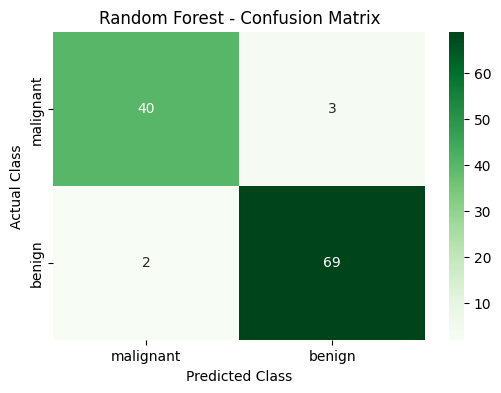

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generating the confusion matrix for Random Forest predictions
conf_matrix_rf = confusion_matrix(y_test, y_predict_Random)
# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
# Adding labels and title
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Random Forest - Confusion Matrix")
plt.show()

### **Support Vector Machine**

In [67]:
from sklearn.svm import SVC
# Initializing the Support Vector Machine classifier with a linear kernel
SupportVector_classifier = SVC(kernel='linear', random_state=42)
# Training the SVM model on the training data
SupportVector_classifier.fit(x_train, y_train)
# Making the predictions on the test set
y_predict_Support = SupportVector_classifier.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluating performance metrics for the SVM model
accuracy_svm = accuracy_score(y_test, y_predict_Support)
precision_svm = precision_score(y_test, y_predict_Support)
recall_svm = recall_score(y_test, y_predict_Support)
f1_svm = f1_score(y_test, y_predict_Support)
# Displaying the basic evaluation results
print("SVM - Performance Metrics:")
print(f"Accuracy:{accuracy_svm:.4f}")
print(f"Precision:{precision_svm:.4f}")
print(f"Recall:{recall_svm:.4f}")
print(f"F1 Score:{f1_svm:.4f}")

SVM - Performance Metrics:
Accuracy:0.9825
Precision:0.9859
Recall:0.9859
F1 Score:0.9859


In [71]:
from sklearn.metrics import classification_report
# Printing the detailed classification report for the SVM model
print("\nSVM - Detailed Classification Report:")
print(classification_report(y_test, y_predict_Support, target_names=data.target_names))


SVM - Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [73]:
# Calculating the macro-averaged metrics (treats all classes equally)
precision_macro_svm = precision_score(y_test, y_predict_Support, average='macro')
recall_macro_svm = recall_score(y_test, y_predict_Support, average='macro')
f1_macro_svm = f1_score(y_test, y_predict_Support, average='macro')
# Calculating the weighted-averaged metrics (accounts for class distribution)
precision_weighted_svm = precision_score(y_test, y_predict_Support, average='weighted')
recall_weighted_svm = recall_score(y_test, y_predict_Support, average='weighted')
f1_weighted_svm = f1_score(y_test, y_predict_Support, average='weighted')
# Displaying the extended evaluation metrics for the SVM model
print("\nExtended Evaluation Metrics (SVM):")
print(f"Macro Precision:{precision_macro_svm:.4f}")
print(f"Macro Recall:{recall_macro_svm:.4f}")
print(f"Macro F1 Score:{f1_macro_svm:.4f}")
print(f"Weighted Precision:{precision_weighted_svm:.4f}")
print(f"Weighted Recall:{recall_weighted_svm:.4f}")
print(f"Weighted F1 Score:{f1_weighted_svm:.4f}")


Extended Evaluation Metrics (SVM):
Macro Precision:0.9813
Macro Recall:0.9813
Macro F1 Score:0.9813
Weighted Precision:0.9825
Weighted Recall:0.9825
Weighted F1 Score:0.9825


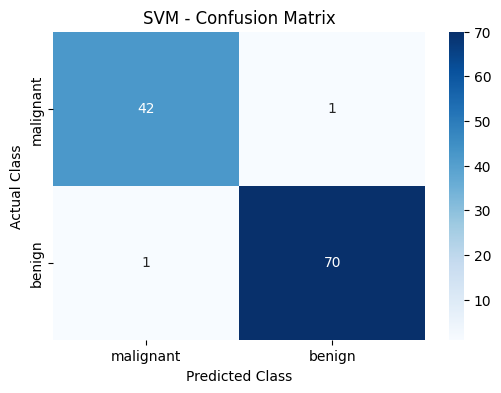

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the confusion matrix for SVM predictions
conf_matrix_svm = confusion_matrix(y_test, y_predict_Support)
# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_svm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
# Adding axis labels and title
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("SVM - Confusion Matrix")
plt.show()

##### An F1 Macro score of 0.9813 and an F1 Weighted score of 0.9825 indicate strong overall performance across both classes, with a slight advantage given to the majority class due to the weighted averaging.

### **k-Nearest Neighbors**

In [79]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing the KNN classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Training the model using the training data
knn_classifier.fit(x_train, y_train)
# Predicting the labels for the test set
y_predict_KNN = knn_classifier.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluating basic performance metrics for the KNN model
accuracy_knn = accuracy_score(y_test, y_predict_KNN)
precision_knn = precision_score(y_test, y_predict_KNN)
recall_knn = recall_score(y_test, y_predict_KNN)
f1_knn = f1_score(y_test, y_predict_KNN)
# Displaying the evaluation results
print("K-Nearest Neighbors (KNN) - Performance Metrics:")
print(f"Accuracy:{accuracy_knn:.4f}")
print(f"Precision:{precision_knn:.4f}")
print(f"Recall:{recall_knn:.4f}")
print(f"F1 Score:{f1_knn:.4f}")

K-Nearest Neighbors (KNN) - Performance Metrics:
Accuracy:0.9737
Precision:0.9857
Recall:0.9718
F1 Score:0.9787


In [81]:
from sklearn.metrics import classification_report
# Display a detailed classification report for the KNN model
print("\nKNN - Detailed Classification Report:")
print(classification_report(y_test, y_predict_KNN, target_names=data.target_names))


KNN - Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [82]:
# Calculating the macro average metrics, which treat all classes equally
precision_macro_knn = precision_score(y_test, y_predict_KNN, average='macro')
recall_macro_knn = recall_score(y_test, y_predict_KNN, average='macro')
f1_macro_knn = f1_score(y_test, y_predict_KNN, average='macro')
# Calculating weighted-average metrics, accounting for class imbalance
precision_weighted_knn = precision_score(y_test, y_predict_KNN, average='weighted')
recall_weighted_knn = recall_score(y_test, y_predict_KNN, average='weighted')
f1_weighted_knn = f1_score(y_test, y_predict_KNN, average='weighted')
# Displaying the extended performance metrics for the KNN classifier
print("\nExtended Metrics (KNN):")
print(f"Precision (Macro):{precision_macro_knn:.4f}")
print(f"Recall (Macro):{recall_macro_knn:.4f}")
print(f"F1 Score (Macro):{f1_macro_knn:.4f}")
print(f"Precision (Weighted):{precision_weighted_knn:.4f}")
print(f"Recall (Weighted):{recall_weighted_knn:.4f}")
print(f"F1 Score (Weighted):{f1_weighted_knn:.4f}")


Extended Metrics (KNN):
Precision (Macro):0.9701
Recall (Macro):0.9743
F1 Score (Macro):0.9721
Precision (Weighted):0.9740
Recall (Weighted):0.9737
F1 Score (Weighted):0.9737


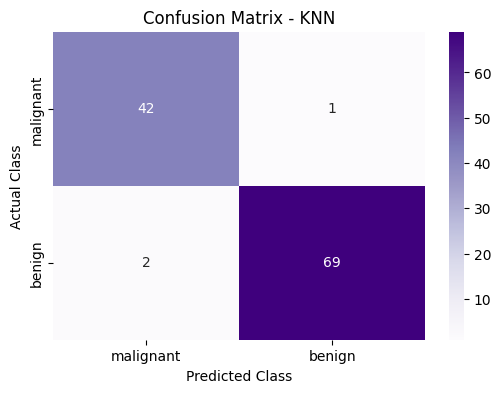

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate the confusion matrix for KNN predictions
conf_matrix_knn = confusion_matrix(y_test, y_predict_KNN)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
# Label the axes and set the title
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - KNN")
plt.show()

##### With an F1 Macro score of 0.9721 and an F1 Weighted score of 0.9737, the model demonstrates strong and consistent performance across both classes.
##### The close alignment of precision, recall, and F1 scores indicates a balanced ability to identify both cancerous and non-cancerous cases effectively.
##### Although it trails slightly behind leading models such as Logistic Regression and Random Forest, KNN still provides dependable predictions.

## **Compare models by evaluating their F1 scores using both 'macro' and 'weighted' averages.**

In [88]:
from sklearn.metrics import f1_score
import pandas as pd
# Calculating F1 scores (macro and weighted) for each model
f1_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'F1 Macro': [
        f1_score(y_test, y_predict_Logic, average='macro'),
        f1_score(y_test, y_predict_Decision, average='macro'),
        f1_score(y_test, y_predict_Random, average='macro'),
        f1_score(y_test, y_predict_Support, average='macro'),
        f1_score(y_test, y_predict_KNN, average='macro')
    ],
    'F1 Weighted': [
        f1_score(y_test, y_predict_Logic, average='weighted'),
        f1_score(y_test, y_predict_Decision, average='weighted'),
        f1_score(y_test, y_predict_Random, average='weighted'),
        f1_score(y_test, y_predict_Support, average='weighted'),
        f1_score(y_test, y_predict_KNN, average='weighted')
    ]
}
# Creating a DataFrame and sort by weighted F1 score in descending order
f1_comparison_df = pd.DataFrame(f1_metrics)
f1_comparison_df = f1_comparison_df.sort_values(by='F1 Weighted', ascending=False)
# Displaying the comparison results
print("\nModel Comparison Based on F1 Scores:")
print(f1_comparison_df.to_string(index=False))


Model Comparison Based on F1 Scores:
              Model  F1 Macro  F1 Weighted
                SVM  0.981330     0.982456
Logistic Regression  0.972120     0.973742
                KNN  0.972120     0.973742
      Random Forest  0.953106     0.956036
      Decision Tree  0.924603     0.929476


In [91]:
import pandas as pd
f1_scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest'],
    'F1 Macro': [ f1_score(y_test, y_predict_Logic, average='macro'), f1_macro, f1_macro_knn, f1_macro_svm, f1_macro_rf],
    'F1 Weighted': [f1_score(y_test, y_predict_Logic, average='weighted'), f1_weighted, f1_weighted_knn, f1_weighted_svm, f1_weighted_rf]
}
f1_df = pd.DataFrame(f1_scores)
f1_df_sorted = f1_df.sort_values(by='F1 Weighted', ascending=False)
print(f1_df_sorted)

                 Model  F1 Macro  F1 Weighted
3                  SVM  0.981330     0.982456
0  Logistic Regression  0.972120     0.973742
2                  KNN  0.972120     0.973742
4        Random Forest  0.953106     0.956036
1        Decision Tree  0.924603     0.929476


## **CLASSIFICATION**

### **Support Vector Machine (SVM):**
##### . SVM emerges as the top-performing model based on both F1 Macro and Weighted scores, indicating strong and balanced performance across classes and good generalization capability.

### **Logistic Regression and k-Nearest Neighbors (KNN):**
##### . These two models show identical F1 scores, ranking just below SVM. Despite being slightly less effective, they still offer solid and dependable performance, especially useful when model interpretability is not a primary concern.

### **Decision Tree:**
##### . This model records the lowest F1 scores among the group, making it the least effective in this comparison. It may be more susceptible to overfitting or underfitting depending on the nature and distribution of the dataset.

<div style="text-align: center;">
<strong>END OF THE PROCESS</strong>
</div>